In [39]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Assignment 1
# dataset = pd.read_csv("./winddata.dat", delimiter=" ")
# dataset.head()
# moments = dataset.iloc[:, 0][:4]
# print("Pandas mean", dataset.mean())
# print("Pandas variance", dataset.var())
# moments.describe()

timestamps, windspeeds = np.loadtxt("./winddata.dat", usecols=(0,1), unpack=True)
# timestamp = timestamp[:3]
moments = windspeeds[:3]
# print("Pandas moment stats", )


In [40]:
print("Numpy mean", np.mean(moments))
print("Numpy variance", np.var(moments))

mean, variance, skewness, kurtosis = sp.stats.moment(moments, moment=[1,2,3,4])
print("SciPy moment mean", mean)
print("SciPy moment variance", variance)
print("SciPy moment skewness", skewness)
print("SciPy moment kurtosis", kurtosis)

Numpy mean 0.12711517762239033
Numpy variance 1.5102686910992409e-05
SciPy moment mean 0.0
SciPy moment variance 1.5102686910992409e-05
SciPy moment skewness 3.95746894553081e-08
SciPy moment kurtosis 3.421367278971921e-10


In [41]:
series = pd.Series(moments)
print("Pandas mean", series.mean())
print("Pandas variance", series.var())
print("Pandas skewness", series.skew())
print("Pandas kurtosis", series.kurt())

Pandas mean 0.12711517762239033
Pandas variance 2.2654030366488614e-05
Pandas skewness 1.65162638394944
Pandas kurtosis nan


#### Mean is OK!

In [42]:
print("Calculated mean", np.sum(moments)/4)
print("Numpy mean", np.mean(moments))

Calculated mean 0.09533638321679275
Numpy mean 0.12711517762239033


#### Standard deviation is OK!

In [43]:
mean = np.mean(moments)
deviations = (moments - mean)**2
summed_centered_moments = np.sum(deviations)
average_centered_moments = summed_centered_moments / len(moments)
standard_deviation = np.sqrt(average_centered_moments)
print("Calculated standard deviation", standard_deviation)
print("Numpy standard deviation", np.std(moments))

Calculated standard deviation 0.003886217558371174
Numpy standard deviation 0.003886217558371174


#### Skewness is OK!

In [44]:
_, _, skewness, kurtosis = sp.stats.moment(moments, moment=[1,2,3,4])

res = (moments - mean)**3
calculated_skewness = np.sum(res / (len(moments) * standard_deviation**3)) 

print("Calculated skewness", calculated_skewness)
print("SciPy skewness", sp.stats.skew(moments))

Calculated skewness 0.674273647732371
SciPy skewness 0.6742736477323708


#### Kurtosis is not OK!

In [45]:
res = (moments - mean)**4
calculated_kurtosis = np.sum(res / (len(moments) * standard_deviation**4)) - 3

print("Calculated kurtosis", calculated_kurtosis)
print("SciPy kurtosis", kurtosis)

Calculated kurtosis -1.5000000000000002
SciPy kurtosis 3.421367278971921e-10


#### Task 2 - Histogram of wind speed

(array([1.329e+03, 2.466e+03, 4.457e+03, 6.206e+03, 8.691e+03, 6.176e+03,
        5.870e+03, 6.712e+03, 5.169e+03, 3.592e+03, 2.551e+03, 2.025e+03,
        1.777e+03, 1.256e+03, 1.000e+03, 5.880e+02, 3.110e+02, 1.070e+02,
        3.100e+01, 6.000e+00]),
 array([0.02655949, 0.03744709, 0.04833469, 0.05922228, 0.07010988,
        0.08099748, 0.09188508, 0.10277268, 0.11366028, 0.12454788,
        0.13543547, 0.14632307, 0.15721067, 0.16809827, 0.17898587,
        0.18987347, 0.20076106, 0.21164866, 0.22253626, 0.23342386,
        0.24431146]),
 <BarContainer object of 20 artists>)

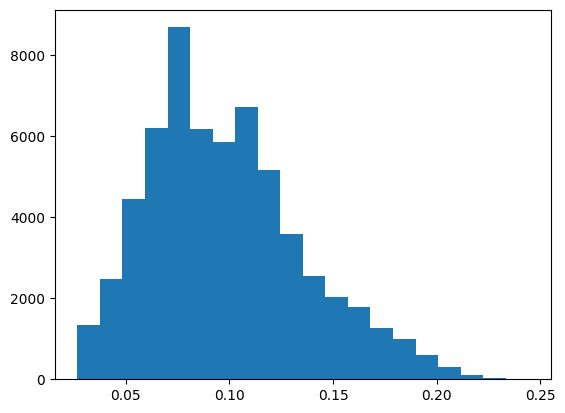

In [46]:
# Alternative 1
bins = 20
plt.hist(windspeeds, bins=20)

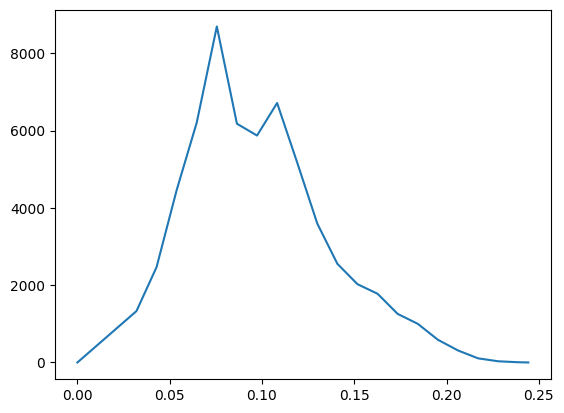

In [47]:
# Alternative 2
hist_values, hist_bin_edges = np.histogram(windspeeds, bins=bins)
hist_bin_midpoints = np.zeros(len(hist_values)+2)
new_hist_values = np.zeros(len(hist_values)+2)

for i in range(len(hist_values)):
    hist_bin_midpoints[i+1] = (hist_bin_edges[i] + hist_bin_edges[i+1])/2
    new_hist_values[i+1] = hist_values[i]

hist_bin_midpoints[len(hist_values)+1] = hist_bin_edges[len(hist_values)] 
new_hist_values[len(hist_values)+1] = 0

plt.plot(hist_bin_midpoints, new_hist_values)

#### Task 3 

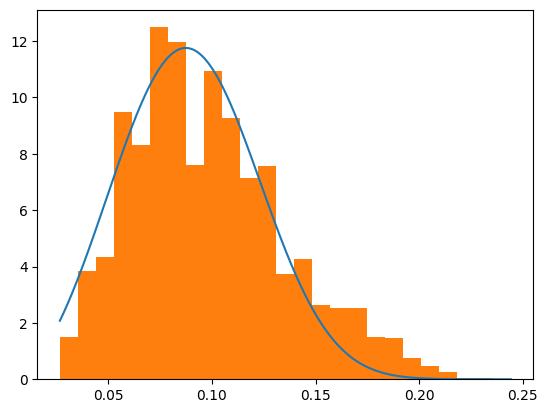

In [65]:
def weibull(v, k, l): # k is the shape, and l is the scale
    return (k/l) * ((v/l)**(k-1)) * np.exp(-(v/l)**k)

dataset = np.array([timestamps, windspeeds])
v = np.linspace(windspeeds.min(), windspeeds.max(), 1000)
plt.plot(v, weibull(v, 3, 0.1))
plt.hist(windspeeds, bins=25, density=True)
plt.show()
